In [99]:
#Call libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('float_format','{:f}'.format)

In [105]:
#Define my dataframe by using the .read_csv function in pandas. Followed by a check to see the data
df = pd.read_csv('avocado-updated.csv')

In [106]:
#Preview column headers
df.columns.to_list()

['date',
 'average_price',
 'total_volume',
 '4046',
 '4225',
 '4770',
 'total_bags',
 'small_bags',
 'large_bags',
 'xlarge_bags',
 'type',
 'year',
 'geography',
 'season']

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30885 entries, 0 to 30884
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30885 non-null  object 
 1   average_price  30885 non-null  float64
 2   total_volume   30885 non-null  float64
 3   4046           30885 non-null  float64
 4   4225           30885 non-null  float64
 5   4770           30885 non-null  float64
 6   total_bags     30885 non-null  float64
 7   small_bags     30885 non-null  float64
 8   large_bags     30885 non-null  float64
 9   xlarge_bags    30885 non-null  float64
 10  type           30885 non-null  object 
 11  year           30885 non-null  int64  
 12  geography      30885 non-null  object 
 13  season         30455 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 3.3+ MB


In [110]:
# Isolate "Total U.S." data
df = df.loc[df['geography']== "Total U.S."]

            date  average_price    total_volume            4046  \
51      1/4/2015       0.950000 31324277.730000 12357161.340000   
105    1/11/2015       1.010000 29063542.750000 11544810.530000   
159    1/18/2015       1.030000 29043458.850000 11858139.340000   
213    1/25/2015       1.040000 28470310.840000 12167445.030000   
267     2/1/2015       0.890000 44655461.510000 18933038.040000   
...          ...            ...             ...             ...   
30666  6/14/2020       1.590000  2192761.000000   108037.000000   
30720  6/21/2020       1.590000  2240038.170000   123964.220000   
30774  6/28/2020       1.590000  2083765.750000   143548.500000   
30828   7/5/2020       1.630000  2239483.590000   147332.860000   
30882  7/12/2020       1.640000  2071489.810000   137270.510000   

                 4225           4770     total_bags     small_bags  \
51    13624083.050000  844093.320000 4498940.020000 3585321.580000   
105   12134773.380000  866574.660000 4517384.180000 378

In [111]:
# wanted to know the shape of the "average_price" column
df.average_price.describe()

count   572.000000
mean      1.330070
std       0.288188
min       0.760000
25%       1.050000
50%       1.350000
75%       1.560000
max       2.090000
Name: average_price, dtype: float64

In [112]:
#Interested in seeing "average_price" and "total_volume" grouped by season
df.groupby(['season']).mean()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
season,,,,,,,,,,
fall,1.381190,16006826.123810,4970192.440635,4892649.337857,321700.486032,5822215.523889,3992270.719048,1741427.753571,88517.059206,2016.968254
spring,1.307013,21715928.801753,7150432.355130,6080824.554870,493034.295130,7986282.405584,5525977.642597,2289393.661883,170911.088117,2017.506494
summer,1.429254,18287889.941716,5933376.947164,5706019.040224,439895.452239,6207696.487761,4463959.902761,1593107.229776,150629.332836,2016.985075
winter,1.222000,20522048.973733,6691788.507200,6095405.564467,477391.838533,7257357.787000,4956171.751533,2181123.721600,120062.313867,2017.440000


In [113]:
#Interested in seeing "average_price" and "total_volume" grouped by type
df.groupby(['type']).mean()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
type,,,,,,,,,,
conventional,1.098986,37600701.989476,12402948.192972,11156982.257972,872470.376084,13168248.279161,9083249.598007,3803188.964545,281809.709615,2017.283217
organic,1.561154,1242645.022063,143567.056573,277955.608007,4817.796748,812963.988217,605437.637587,207463.965804,62.377832,2017.283217


In [114]:
#Box Plot Comparison of Average Price by Type
Organic = df.loc[df.type == 'organic']['average_price']
Conventional = df.loc[df.type ==  'conventional']['average_price']

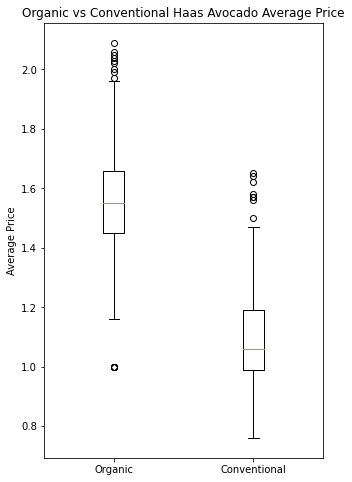

In [115]:
plt.figure(figsize=(5,8))
labels = ['Organic', 'Conventional']
plt.boxplot([Organic, Conventional], labels=labels)

plt.title('Organic vs Conventional Haas Avocado Average Price')
plt.ylabel('Average Price')
plt.show()

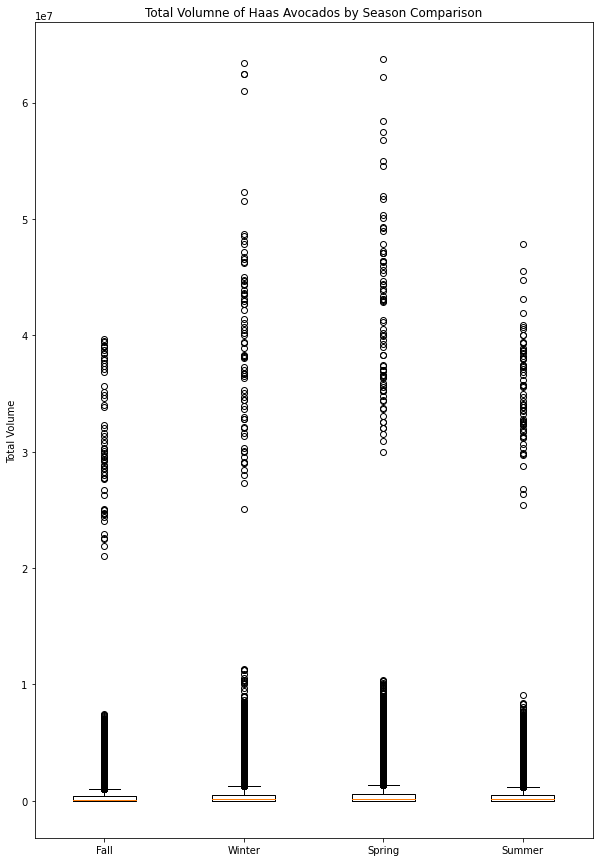

In [101]:
plt.figure(figsize=(10,15))
Fall = df.loc[df.season=='fall']['total_volume']
Winter = df.loc[df.season=='winter']['total_volume']
Spring = df.loc[df.season=='spring']['total_volume']
Summer = df.loc[df.season=='summer']['total_volume']

labels = ['Fall','Winter','Spring','Summer']
plt.boxplot([Fall,Winter,Spring,Summer], labels=labels)
plt.title('Total Volumne of Haas Avocados by Season Comparison')
plt.ylabel('Total Volume')
plt.show()